# SVM Regression

using SVM to predict continous values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.simplefilter(action = "ignore", category= FutureWarning)

### DATA 
The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.
Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

In [3]:
df = pd.read_csv("../DATA/cement_slump.csv")

In [4]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


### Data Visualization

<Axes: >

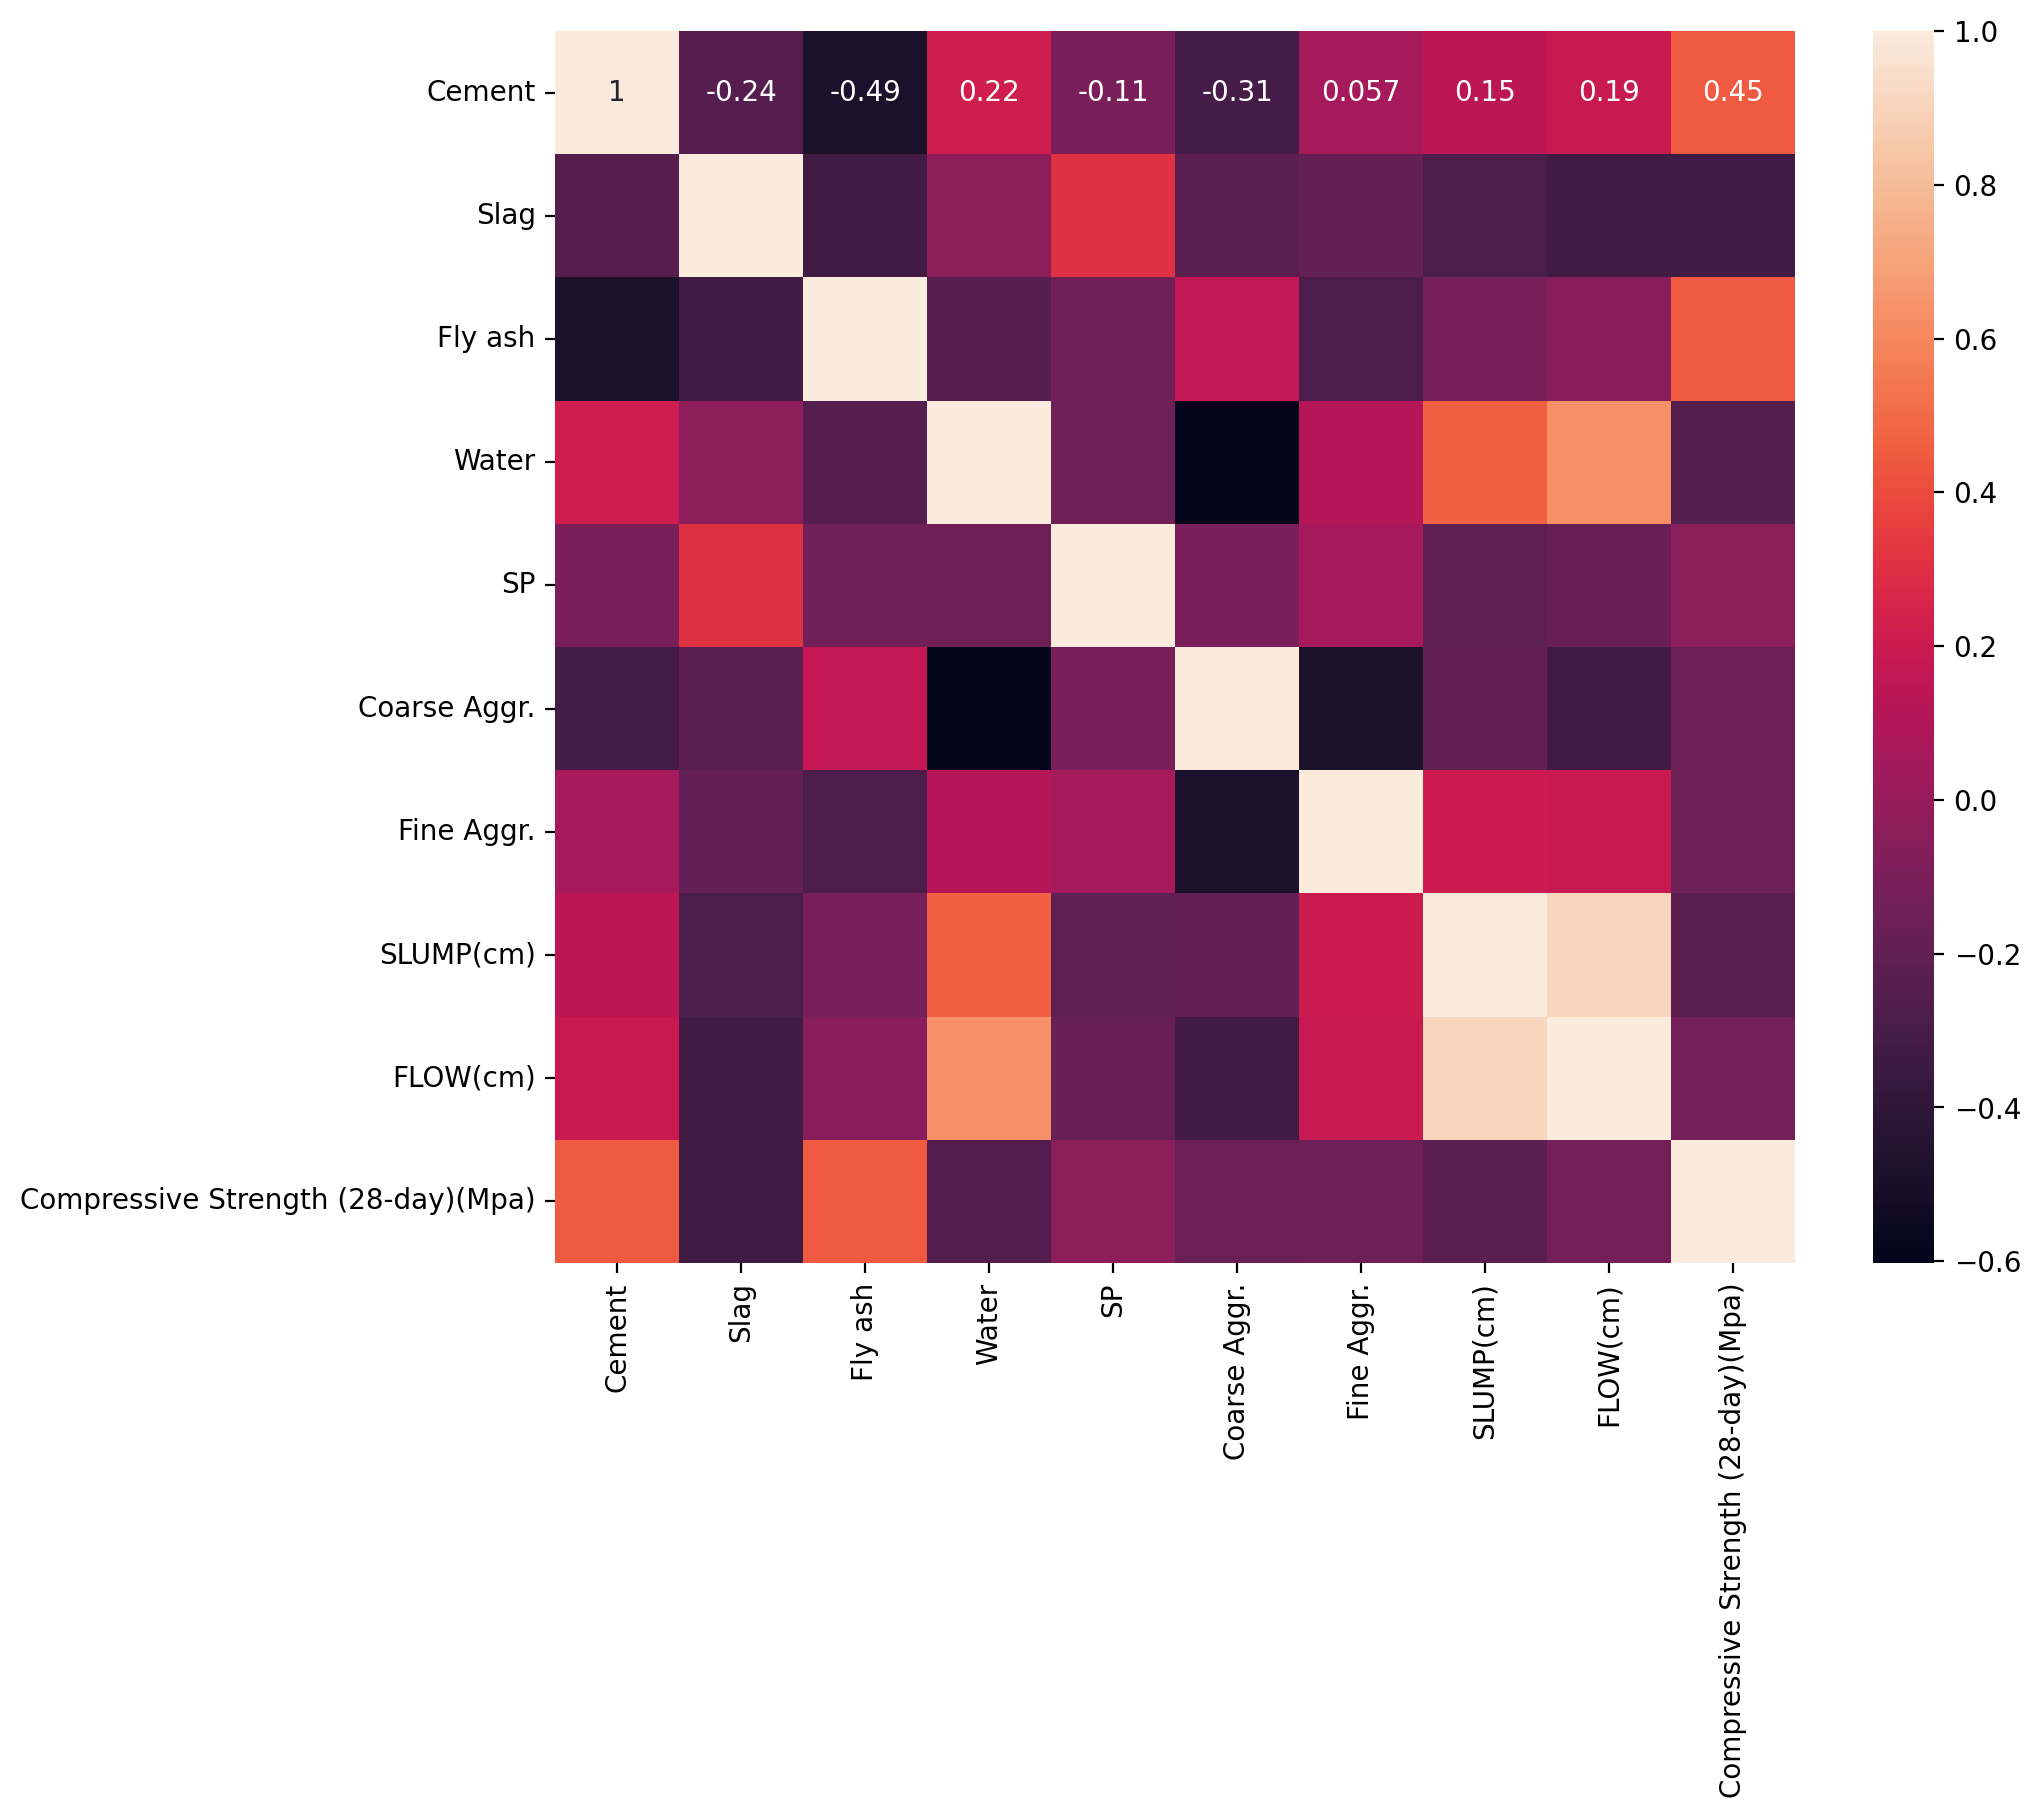

In [6]:
plt.figure(figsize = (10,8), dpi = 200)
sns.heatmap(data = df.corr(), annot = True)

#### Scikit-Learn imports

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Data Split

In [8]:
X = df.drop("Compressive Strength (28-day)(Mpa)", axis = 1)
y = df["Compressive Strength (28-day)(Mpa)"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(X_train)

StandardScaler()

In [12]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
base_model = SVR()

In [14]:
base_model.fit(X_train, y_train)

SVR()

In [15]:
predictions  = base_model.predict(X_test)

In [16]:
mean_absolute_error(y_test, predictions)

5.236902091259178

In [17]:
np.sqrt(mean_squared_error(y_test, predictions))

6.695914838327133

#### Tuning model 

In [18]:
parameter_grid = {"kernel" : ["linear", "rbf", "sigmoid", "poly"],
                 "C" : [0.01, 0.1, 0.5, 1], "gamma" : ["scale", "auto"],
                 "degree": [2,3,4], "epsilon": [0,0.01, 0.1, .5,1,2]}

In [19]:
model = GridSearchCV(base_model, param_grid= parameter_grid)

In [20]:
model.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [21]:
model.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

#### Predictions and metrics

In [22]:
predictions = model.predict(X_test)

In [23]:
mean_absolute_error(y_test, predictions)

2.5128012210762365

In [24]:
np.sqrt(mean_squared_error(y_test, predictions))

3.178210305119858